In [2]:
#実行に必要なライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from PIL import Image
from sklearn.decomposition import PCA

In [3]:
#MNISTデータの取得
(x_train, t_train), (x_test, t_test) = mnist.load_data()

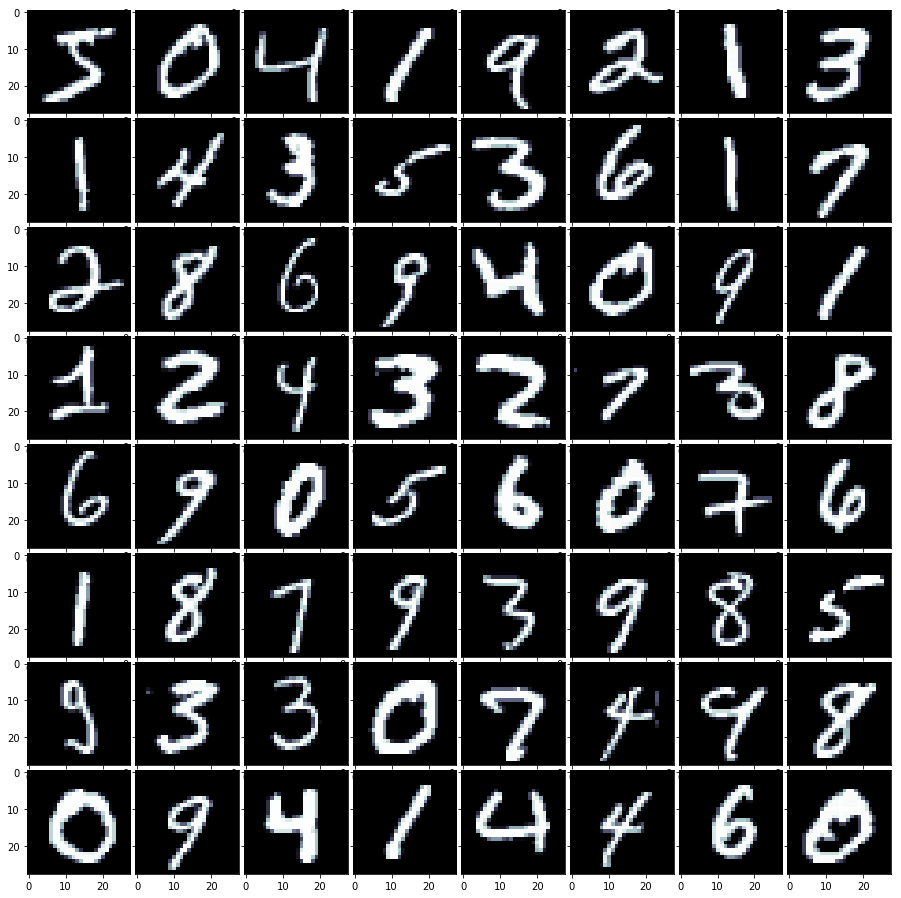

In [43]:
fig = plt.figure(figsize=(12, 12))
#画像を表示する際に配置の調整
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.05, hspace=0.05)
#64枚の画像を表示
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_train[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

In [6]:
#次元を784(全次元)に設定し、PCAクラスのインスタンス化を行う
pca_mnist = PCA(n_components=784)
#それぞれの画像サイズ縦28x横28の元々の画像を一列(784)にreshapeする
x_train_reshaped = x_train[:, :, :].reshape(-1, 28*28)
#rshapeしたデータに対し、主成分の空間に変換する
x_proj = pca_mnist.fit_transform(x_train_reshaped)
#主成分の空間に変換した後の形
x_proj.shape

(60000, 784)

In [25]:
#累積寄与率が50%、75%、90%を超えるのは第何主成分化を求める
print('累積寄与率50%を超えるのは第{}主成分までの累積'.format(
    np.sum(np.cumsum(pca_mnist.explained_variance_ratio_) < 0.50)))
print('累積寄与率75%を超えるのは第{}主成分までの累積'.format(
    np.sum(np.cumsum(pca_mnist.explained_variance_ratio_) < 0.75)))
print('累積寄与率90%を超えるのは第{}主成分までの累積'.format(
    np.sum(np.cumsum(pca_mnist.explained_variance_ratio_) < 0.90)))

累積寄与率50%を超えるのは第10主成分までの累積
累積寄与率75%を超えるのは第33主成分までの累積
累積寄与率90%を超えるのは第86主成分までの累積


In [26]:
#次元削減のための関数
#今回は1枚目の画像に対して次元削減を行う
def reduce_dimension(ndim):
    input = x_train[0].reshape(-1)
    A = np.dot((input - pca_mnist.mean_), pca_mnist.components_.T[:, :ndim])
    A_inv = pca_mnist.components_.T[:, :ndim].dot(A) + pca_mnist.mean_
    return A_inv
#入力画像のサイズ
image_shape = (28, 28)

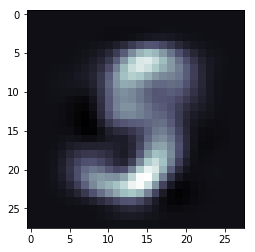

In [44]:
#第10次元までの累積(50%)
n_dim = 10
compressed_num = reduce_dimension(n_dim)
plt.imshow(compressed_num.reshape(image_shape), cmap=plt.cm.bone, interpolation='nearest')

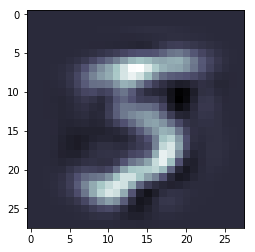

In [45]:
#第33次元までの累積(75%)
n_dim = 33
compressed_num = reduce_dimension(n_dim)
plt.imshow(compressed_num.reshape(image_shape), cmap=plt.cm.bone, interpolation='nearest')

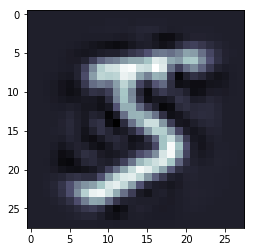

In [46]:
#第86次元までの累積(90%)
n_dim = 86
compressed_num = reduce_dimension(n_dim)
plt.imshow(compressed_num.reshape(image_shape), cmap=plt.cm.bone, interpolation='nearest')

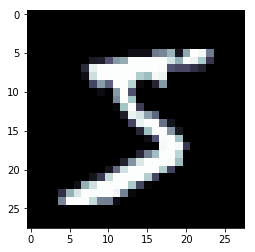

In [47]:
#第784次元までの累積(100%)
n_dim = 784
compressed_num = reduce_dimension(n_dim)
plt.imshow(compressed_num.reshape(image_shape), cmap=plt.cm.bone, interpolation='nearest')